<a href="https://colab.research.google.com/github/Prince11jain/Global-Terrorism-Analysis/blob/main/Prince_jainGlobal_Terrorism_Analysis_Capstone_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

Today we are facing a terrorism all over the world and this problem increase day by day , Many of people lost there life , love ones and their properties. Terrorism are world-wide problem and many countries want a data that provide the complete records of these activities take place so that they can take a  measures for controlling these activities .

Lets study the data provided to us which consist huge amount of information about globel terroism and try to find out cause and the remedies for this problem.

lets get start...


In [ ]:
# As we know we have import some lib for the future use 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# We have to mount our drive for access data 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# here we define our path of data and load it.
df=pd.read_csv('/content/drive/MyDrive/Global Terrorism Data.csv',encoding="ISO-8859-1")

In [ ]:
# these provide us the details of our data  like size , column , row and data type .
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
df.info(verbose = True,null_counts = True)

In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
# In the chunk of data we have sort useful data column which give important information
considered_column  = ['eventid', 'iyear', 'imonth', 'iday', 'location','country_txt',    'propextent_txt' , 'propvalue' , 'ransompaid'  ]

In [ ]:
# we consider 18 no. of column which consist maximum amount of information
len(considered_column)

9

In [ ]:
df['iyear'].describe()

count    181691.000000
mean       2002.638997
std          13.259430
min        1970.000000
25%        1991.000000
50%        2009.000000
75%        2014.000000
max        2017.000000
Name: iyear, dtype: float64

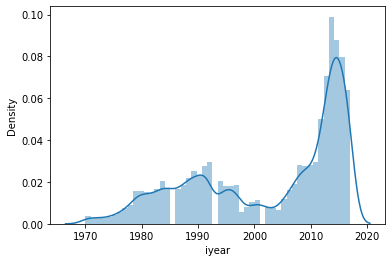

In [ ]:
#histogram
sns.distplot(df['iyear'])

In this histogram it is clear that the these activities increase from year 2010-2017, and the 2012-2013 are most effected year in which terrorism take place and maximum cases happened .

In [ ]:
df['location'].describe()

count                                                55495
unique                                               44109
top       The attack took place in Baghdad, Baghdad, Iraq.
freq                                                   142
Name: location, dtype: object

From above operation we find that Baghdad(Iraq) is most attacked place in the world. And most of the activities take place in that country.

In [ ]:
df['weaptype1_txt'].value_counts

<bound method IndexOpsMixin.value_counts of 0            Unknown
1            Unknown
2            Unknown
3         Explosives
4         Incendiary
             ...    
181686      Firearms
181687    Explosives
181688    Incendiary
181689    Explosives
181690    Explosives
Name: weaptype1_txt, Length: 181691, dtype: object>

In [ ]:
df['region_txt'].value_counts

<bound method IndexOpsMixin.value_counts of 0         Central America & Caribbean
1                       North America
2                      Southeast Asia
3                      Western Europe
4                           East Asia
                     ...             
181686             Sub-Saharan Africa
181687     Middle East & North Africa
181688                 Southeast Asia
181689                     South Asia
181690                 Southeast Asia
Name: region_txt, Length: 181691, dtype: object>

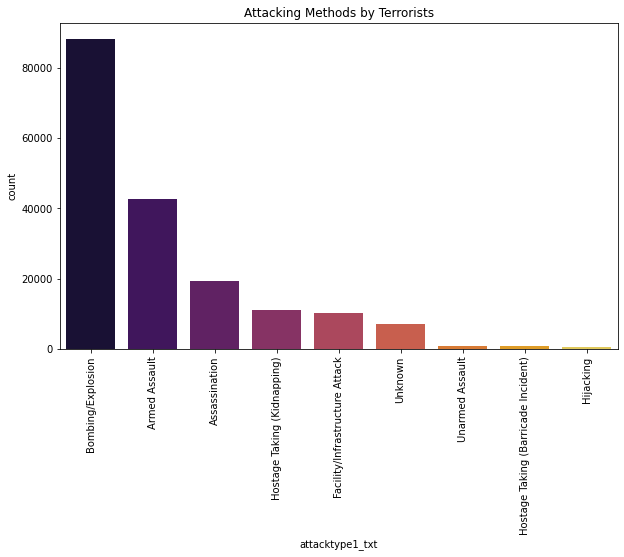

In [ ]:
plt.subplots(figsize=(10,6))
sns.countplot('attacktype1_txt',data=df, palette='inferno',order=df['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

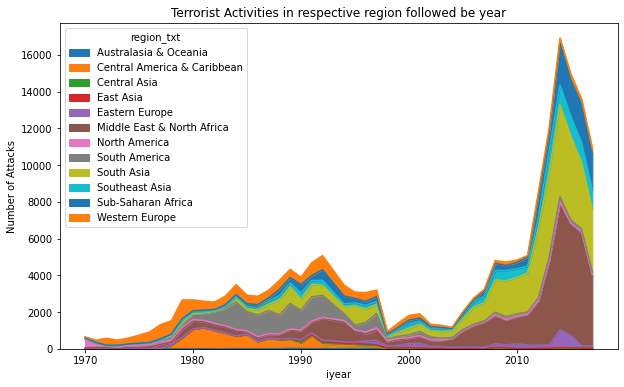

In [ ]:
pd.crosstab(df.iyear, df.region_txt).plot(kind='area',figsize=(10,6))
plt.title('Terrorist Activities in respective region followed be year')
plt.ylabel('Number of Attacks')
plt.show()

In [ ]:
df['propvalue'].describe()

count    3.898900e+04
mean     2.088119e+05
std      1.552463e+07
min     -9.900000e+01
25%     -9.900000e+01
50%     -9.900000e+01
75%      1.000000e+03
max      2.700000e+09
Name: propvalue, dtype: float64

In [ ]:
geog=pd.DataFrame({'country': df['country_txt'].value_counts().index,
                   'number_of_attacks': df['country_txt'].value_counts().values})

geog.head(10)


,country,number_of_attacks
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
5,Philippines,6908
6,Peru,6096
7,El Salvador,5320
8,United Kingdom,5235
9,Turkey,4292


In [ ]:
geog.tail(10)

,country,number_of_attacks
195,Vatican City,1
196,Falkland Islands,1
197,St. Lucia,1
198,North Korea,1
199,New Hebrides,1
200,International,1
201,Wallis and Futuna,1
202,South Vietnam,1
203,Andorra,1
204,Antigua and Barbuda,1


In [ ]:
kills = pd.DataFrame({'country': df['country_txt'].value_counts().index,
                   'nkills' : df['country_txt'].value_counts().values})
                  
kills.head(10)

,country,nkills
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
5,Philippines,6908
6,Peru,6096
7,El Salvador,5320
8,United Kingdom,5235
9,Turkey,4292


In [ ]:
#@title Default title text
fig = px.choropleth(geog, locations="country", 
locationmode='country names', color="number_of_attacks", 
hover_name="country", range_color=[1, 1000], 
color_continuous_scale="reds",title='Number of terrorist attacks by country')
((fig.update(layout_coloraxis_showscale=True,)))
fig.show()


In [ ]:
print('Most affected country:', df['country_txt'].value_counts().idxmax())
print('Highest Terrorist Attacks region :', df['region_txt'].value_counts().idxmax() )
print('Maximun peaople killed in single attack:',df['nkill'].max(),'that took place in', df.loc[df['nkill'].idxmax(), 'country_txt'])
print("Most affected year:",df['iyear'].value_counts().idxmax())
print("Month with the most attacks:",df['imonth'].value_counts().idxmax())
print("Most used weapoan:",df['attacktype1_txt'].value_counts().idxmax())
print('Terrorist Group with Highest Terror Attacks:', df['gname'].value_counts()[1:10].idxmax())
print('Highest weopean used by terrorist:', df['weaptype1_txt'].value_counts().idxmax() )
print('Most peaceful country:', df['country_txt'].value_counts().idxmin())

Most affected country: Iraq
Highest Terrorist Attacks region : Middle East & North Africa
Maximun peaople killed in single attack: 1570.0 that took place in Iraq
Most affected year: 2014
Month with the most attacks: 5
Most used weapoan: Bombing/Explosion
Terrorist Group with Highest Terror Attacks: Taliban
Highest weopean used by terrorist: Explosives
Most peaceful country: Vatican City
